In [1]:
from guitar_scraping.questions import *
import pandas as pd

In [4]:
df = seasonality_base_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273294 entries, 0 to 273293
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   artikelnummer  273294 non-null  float64       
 1   date           273294 non-null  datetime64[ns]
 2   preis          273294 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 6.3 MB


49.3

9999.0

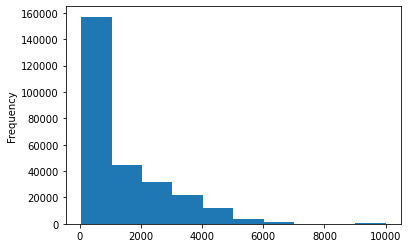

In [9]:
df.preis.plot.hist()
display(df.preis.min())
display(df.preis.max())

In [17]:
# Generate analysis DF
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

mean_price = df.groupby(['artikelnummer','year']).preis.mean()
mean_price_december = df[df.month==12].groupby(['artikelnummer','year']).preis.mean()

In [43]:

ana_df = pd.DataFrame({'mean_price':mean_price, 'mean_price_december':mean_price_december})
ana_df.info()

plot_args = dict(
    alpha=.5,
)

ana_df['price_difference'] = ana_df.mean_price - ana_df.mean_price_december
ana_df['price_difference_pct'] = ana_df.price_difference / ana_df.mean_price * 100



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3823 entries, (107905.0, 2019) to (510432.0, 2021)
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mean_price           3823 non-null   float64
 1   mean_price_december  2107 non-null   float64
dtypes: float64(2)
memory usage: 154.7 KB


<AxesSubplot:ylabel='Frequency'>

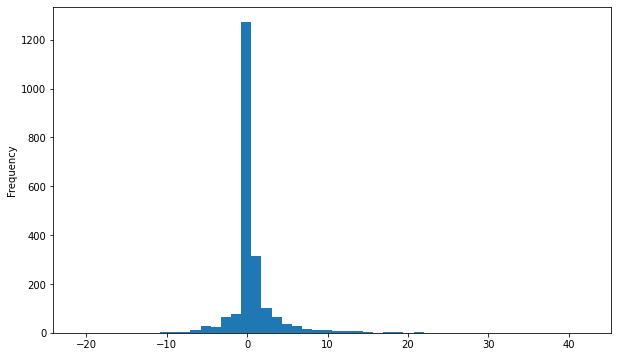

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))


ana_df.price_difference_pct.plot.hist(bins=50)

In [54]:
import numpy as np
bootstrapped_means = np.array([ ana_df.price_difference_pct.sample(50).mean() for i in range(50000)])

-2.2575080084000447

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3823 entries, (107905.0, 2019) to (510432.0, 2021)
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_price            3823 non-null   float64
 1   mean_price_december   2107 non-null   float64
 2   price_difference      2107 non-null   float64
 3   price_difference_pct  2107 non-null   float64
dtypes: float64(4)
memory usage: 214.4 KB


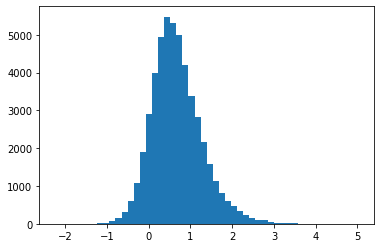

In [55]:
plt.hist(bootstrapped_means, bins=50)
display(bootstrapped_means.min())

ana_df.info()

In [57]:
import scipy.stats as stats
stats.f_oneway([0],bootstrapped_means)



F_onewayResult(statistic=1.2423640842681183, pvalue=0.2650212807205494)